Example of Plotting Results of a travel time grid calculated form DetectTime_Generic. 

Input: 
grdfile: CSV file containing the grid latitude (EVLA), longitude (EVLO), and Detection Time (Time_4STNS).
stnfile: CSV file containing station Latitudes (LAT) and Longitudes (LON); it may contain other columns but that data will not be used

Output: A png map of the calculation

Requirements: PyGMT and Pandas

Note for very large or very small areas the projection and size of the seismic station symbols may need to be manually adjusted. See PyGMT manual pages for details. 

In [13]:
import pygmt  
import pandas as pd

In [21]:
#Load traveltime csv results
grdfile='Seismic_TT_test.csv'
df_TT = pd.read_csv(grdfile, delimiter=',')
print(df_TT)

#Load Station locations
stnfile='/Users/evanacore/Downloads/carib_stats_20240701-20240731.csv'
stndf=pd.read_csv(stnfile)
print(stndf)

#Set Output file name
ofile='CARIBE_seismic_TT.png'

#set Region
plt_region=[-90,-55,-1,30]

#set grid spacing 
nspace=0.5

#Set traveltime colorbar
maxtime=240
time_int=10
pygmt.makecpt(cmap="cool", series=[0, maxtime, time_int])

        Unnamed: 0  EVLO  EVLA  Time_4STNS  Time_8STNS
0                0 -90.0  -5.0  219.067117  225.335419
1                1 -89.9  -5.0  218.457139  224.931752
2                2 -89.8  -5.0  217.853376  224.535238
3                3 -89.7  -5.0  217.255900  224.145928
4                4 -89.6  -5.0  216.664782  223.697114
...            ...   ...   ...         ...         ...
160395      160395 -50.4  34.9  275.265845  280.074316
160396      160396 -50.3  34.9  275.797997  280.610487
160397      160397 -50.2  34.9  276.332889  281.134351
160398      160398 -50.1  34.9  276.870484  281.656142
160399      160399 -50.0  34.9  277.410754  282.180614

[160400 rows x 5 columns]
       N                           LOCATION        LAT         LON  \
0      1                  FLORIDA PENINSULA  27.036100  -80.361800   
1      2                  FLORIDA PENINSULA  25.865700  -80.907000   
2      3                      CENTRAL TEXAS  32.001500  -95.808400   
3      4                      CEN

In [22]:
#create grid from xyz 
grid=pygmt.xyz2grd(x=df_TT.EVLO, y=df_TT.EVLA, z=df_TT.Time_4STNS, spacing=(nspace, nspace), region=plt_region)

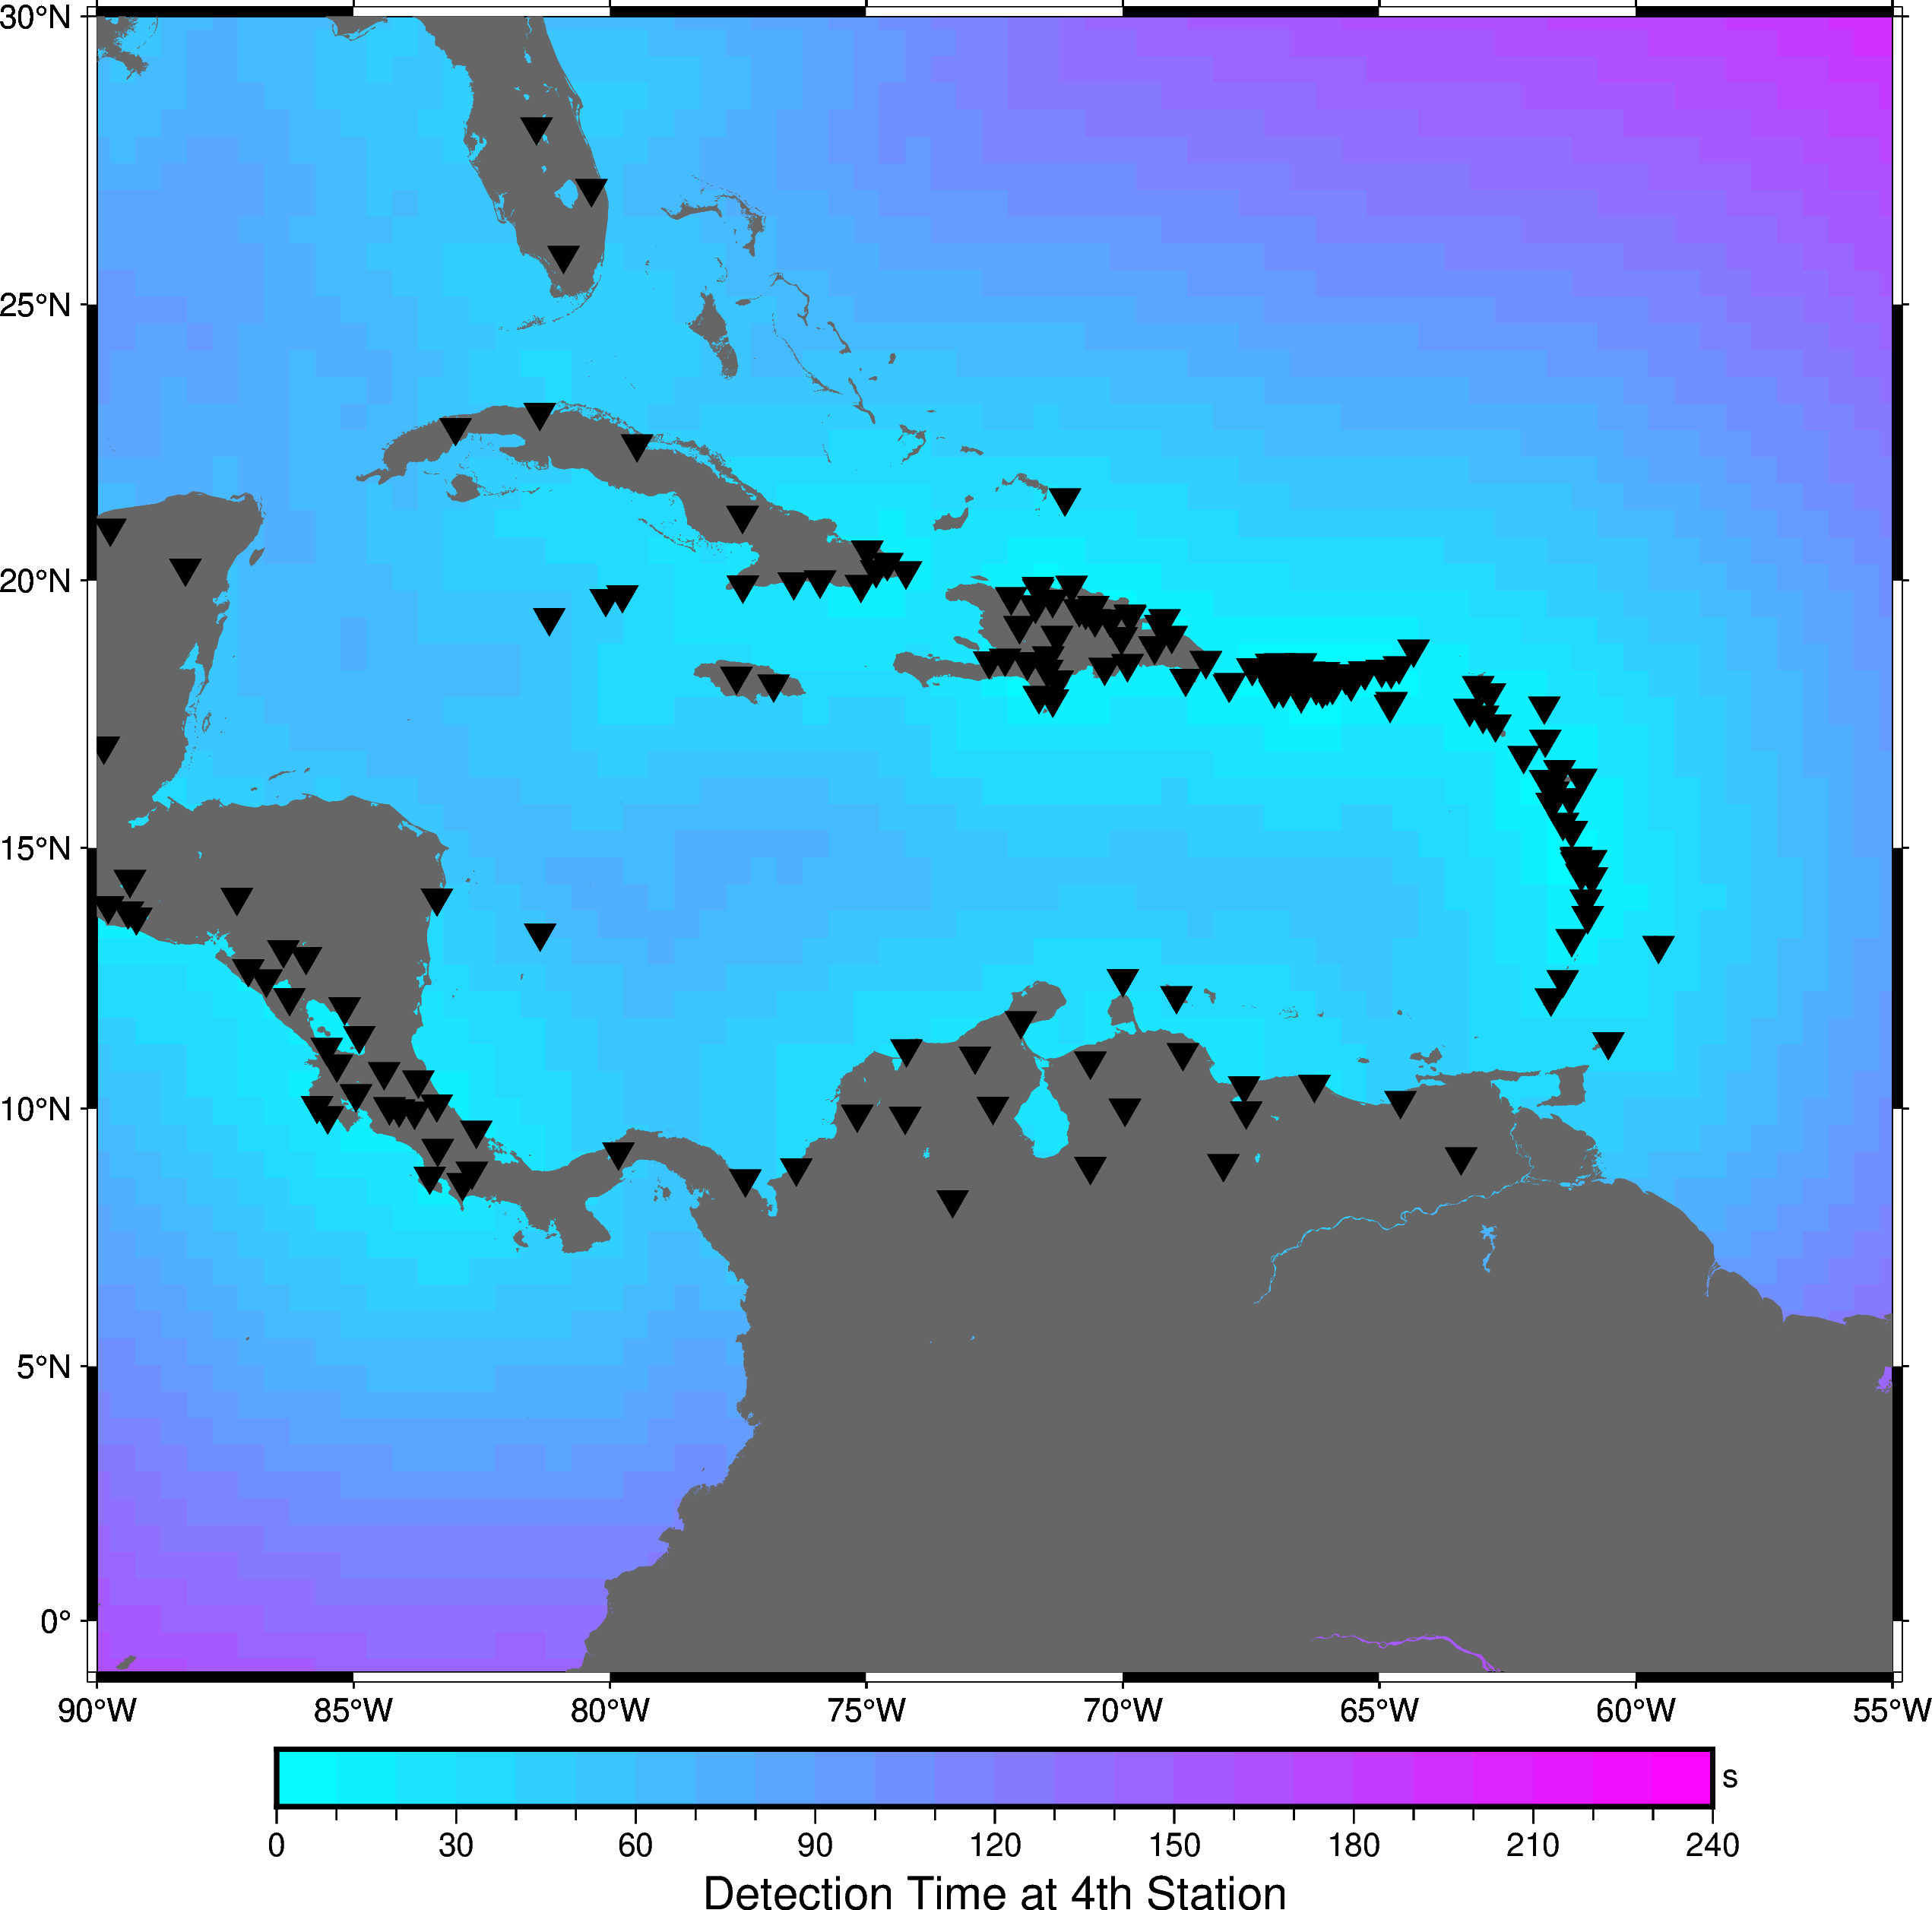

In [23]:
fig = pygmt.Figure()
fig.grdimage(
    grid=grid,
    projection="M20c",
    region=plt_region,
    cmap=True,
    frame=True,
)

fig.basemap(frame=["a"])
fig.colorbar(frame=["xa30f10+lDetection Time at 4th Station", "y+ls",])
fig.coast(land="#666666")

fig.plot(x = stndf.LON, y = stndf.LAT,
         fill='black',
         style='i0.4c',
         cmap=False,
         pen = 'black')

fig.savefig(ofile)
fig.show()